In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

1      2
2      1
4      1
5      1
6      1
7      1
8      2
9      2
10    14
11    40
12    48
Name: date, dtype: int64

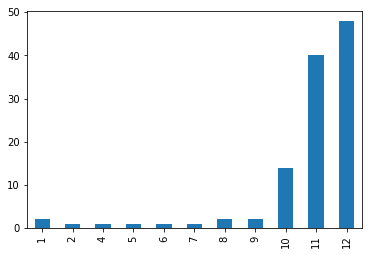

In [18]:
r = release_dates
r = r[r.title.str.contains('Christmas')]
r = r[r.country == 'USA']
r = r.date.dt.month.value_counts()
r = r.sort_index()
r.plot(kind ='bar')
r

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

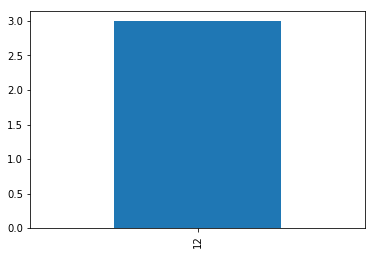

In [25]:
r = release_dates
r = r[(r.title.str.startswith('The Hobbit'))&(r.country == 'USA')]
r = r.date.dt.month.value_counts()
r = r.sort_index()
r.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

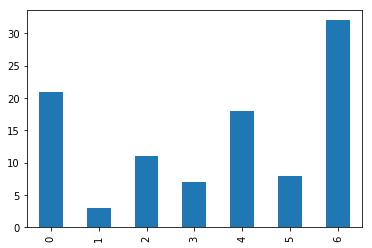

In [29]:
r = release_dates
r = r[(r.title.str.contains('Romance'))&(r.country == 'USA')]
r = r.date.dt.dayofweek.value_counts().sort_index()
r.plot(kind= 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

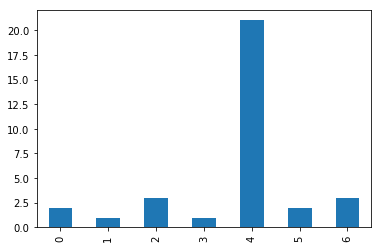

In [33]:
r = release_dates
r = r[(r.title.str.contains('Action'))&(r.country == 'USA')]
r = r.date.dt.dayofweek.value_counts().sort_index()
r.plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [44]:
r = release_dates
c = cast
r = r[r.country == 'USA']
c = c[(c.name == 'Judi Dench')&(c.year//10*10 == 1990)]
c.merge(r)#.sort_values('date')


,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

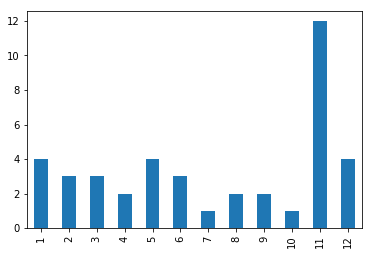

In [53]:
c = cast
r = release_dates
c = c[c.name == 'Judi Dench']
r = r[r.country =='USA']
cr = c.merge(r)
cr = cr.date.dt.month.value_counts().sort_index()
cr.plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

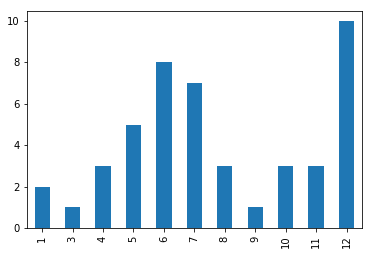

In [57]:
c = cast
r = release_dates

c = c[c.name == 'Tom Cruise']
r = r[r.country == 'USA']
cr = c.merge(r)
cr = cr.date.dt.month.value_counts().sort_index()
cr.plot('bar')

In [5]:
r = release_dates
r


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16
5,#Lucky Number,2015,USA,2015-09-01
6,#Nerealnaya lyubov,2014,Russia,2014-02-13
7,#Pellichoopulu,2016,India,2016-07-29
8,#Screamers,2016,USA,2017-10-31
9,#Sequence,2013,Spain,2013-12-21


In [6]:
r.date.dt.year

0         2007
1         2015
2         2015
3         2015
4         2016
5         2015
6         2014
7         2016
8         2017
9         2013
10        2014
11        2014
12        2016
13        2014
14        2015
15        2017
16        1972
17        1972
18        1972
19        1972
20        1972
21        1972
22        1972
23        1972
24        1972
25        1973
26        1973
27        1935
28        1939
29        1918
          ... 
461255    2005
461256    2005
461257    2005
461258    2005
461259    2005
461260    2005
461261    2005
461262    2005
461263    2005
461264    2005
461265    2005
461266    2005
461267    2005
461268    2005
461269    2005
461270    2005
461271    2005
461272    2005
461273    2005
461274    2005
461275    2005
461276    2005
461277    2005
461278    2005
461279    2005
461280    2005
461281    2005
461282    2005
461283    2005
461284    2005
Name: date, dtype: int64

In [ ]:
#merge

In [7]:
c = cast
c[c.name == 'Ellen Page']
c.merge(release_dates)


,title,year,name,type,character,n,country,date
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Taiwan,2016-05-27
1,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,Germany,2016-10-06
2,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,Taiwan,2016-05-27
3,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,Germany,2016-10-06
4,Closet Monster,2015,Chunk (III),actor,Buffy 1,28.0,Taiwan,2016-05-27
5,Closet Monster,2015,Chunk (III),actor,Buffy 1,28.0,Germany,2016-10-06
6,Closet Monster,2015,Teigan Follett,actor,Greg,20.0,Taiwan,2016-05-27
7,Closet Monster,2015,Teigan Follett,actor,Greg,20.0,Germany,2016-10-06
8,Closet Monster,2015,Jack (IV) Fulton,actor,Oscar Madly (9),2.0,Taiwan,2016-05-27
9,Closet Monster,2015,Jack (IV) Fulton,actor,Oscar Madly (9),2.0,Germany,2016-10-06


In [ ]:
# pivot

In [8]:
r = release_dates
r = r[r.title.str.startswith('Star Wars: Episode')]
r = r[r.country.str.startswith('U')]
r.pivot('title','country', 'date')

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-15,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,2005-05-18
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,1984-01-01
Star Wars: Episode VII - The Force Awakens,2015-12-17,2015-12-18,2015-12-17,2015-12-17,2015-12-17


In [9]:
c = cast
c = c[c.n <=2]
c = c[c.name == 'Cary Grant']
c.head()


,title,year,name,type,character,n
859522,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0
859523,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0
859524,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0
859526,Born to Be Bad,1934,Cary Grant,actor,Malcolm Trevor,2.0
859527,Bringing Up Baby,1938,Cary Grant,actor,David,2.0


In [10]:
c = c. merge(cast, on = ['title', 'year'])
c = c[c.n_y <=2]
c = c[c.name_y != 'Cary Grant']
c

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
63,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1.0,Deborah Kerr,actress,Terry McKay,2.0
108,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1.0,Priscilla Lane,actress,Elaine Harper,2.0
159,Big Brown Eyes,1936,Cary Grant,actor,Danny Barr,1.0,Joan Bennett,actress,Eve Fallon,2.0
211,Born to Be Bad,1934,Cary Grant,actor,Malcolm Trevor,2.0,Loretta Young,actress,Letty Strong,1.0
258,Bringing Up Baby,1938,Cary Grant,actor,David,2.0,Katharine Hepburn,actress,Susan,1.0
302,Charade,1963,Cary Grant,actor,Peter Joshua,1.0,Audrey Hepburn,actress,Regina Lampert,2.0
318,Crisis,1950,Cary Grant,actor,Dr. Eugene Norland Ferguson,1.0,Jos? Ferrer,actor,Raoul Farrago,2.0
392,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0,John Garfield,actor,Wolf,2.0
513,Dream Wife,1953,Cary Grant,actor,Clemson Reade,1.0,Deborah Kerr,actress,Effie,2.0
544,Enter Madame!,1935,Cary Grant,actor,Gerald Fitzgerald,2.0,Elissa Landi,actress,Lisa Della Robbia,1.0
